In [1]:
import yfinance as yf
import pandas as pd
import os

In [2]:
if os.path.exists("sp500.csv"):
    sp500 = pd.read_csv("sp500.csv", index_col=0)
else:
    sp500 = yf.Ticker("^GSPC")
    sp500 = sp500.history(period="max")
    sp500.to_csv("sp500.csv")

In [3]:
sp500.index = pd.to_datetime(sp500.index)

In [4]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,0,0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,0,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,0,0


In [5]:
import pandas_datareader.data as web

<AxesSubplot:xlabel='Date'>

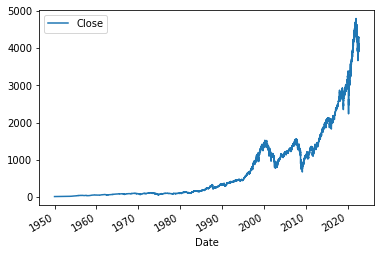

In [35]:
sp500.plot.line(y="Close", use_index=True)

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500.shape  # (18292, 5)
sp500.columns   #  Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
sp500.index   #  DatetimeIndex(['1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06',... dtype='datetime64[ns]', name='Date', length=18292, freq=None)

In [21]:
sp500["Tomorrow"] = sp500["Close"].shift(1)
sp500["Yesterday"] = sp500["Close"].shift(-1)

In [26]:
sp500.tail(7)

,Open,High,Low,Close,Volume,Tomorrow,Yesterday,Target
Date,,,,,,,,
2022-09-01,3936.729980,3970.229980,3903.649902,3966.850098,3754570000,3955.000000,3924.260010,0
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3966.850098,3908.189941,1
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3924.260010,3979.870117,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,3908.189941,4006.179932,0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,3979.870117,4067.360107,0
2022-09-09,4022.939941,4076.810059,4022.939941,4067.360107,0,4006.179932,4107.279785,0
2022-09-12,4083.669922,4119.279785,4083.669922,4107.279785,1602969000,4067.360107,NaN,0


In [24]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [39]:
sp500 = sp500.loc["1990-01-01":].copy()

In [36]:
sp500    #.shape  #   (18292, 8)
sp500C = sp500.dropna()
sp500C  #  .shape   #  (18290, 8)

,Open,High,Low,Close,Volume,Tomorrow,Yesterday,Target
Date,,,,,,,,
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.660000,16.930000,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.850000,16.980000,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.930000,17.080000,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,16.980000,17.030001,0
1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000,17.080000,17.090000,1
...,...,...,...,...,...,...,...,...
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3966.850098,3908.189941,1
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3924.260010,3979.870117,1
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,3908.189941,4006.179932,0


In [37]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]  #    0.6190476190476191 
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [38]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index= test.index)
precision_score(test["Target"], preds)   #  0.6190476190476191 

0.6190476190476191

<AxesSubplot: xlabel='Date'>

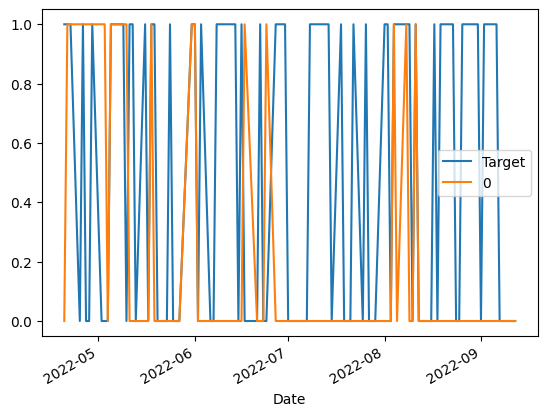

In [39]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [41]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [42]:
combined

,Target,0
Date,,
2022-04-20,1,0
2022-04-21,1,1
2022-04-22,1,1
2022-04-25,0,1
2022-04-26,1,1
...,...,...
2022-09-06,1,0
2022-09-07,0,0
2022-09-08,0,0


In [43]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [44]:
predictions = backtest(sp500, model, predictors)

In [45]:
predictions["Predictions"].value_counts()     #  0    3337    1    2401     old val; 
predictions["Predictions"].value_counts()     #  0    10819   1    4973     new val;

0    10819
1     4973
Name: Predictions, dtype: int64

In [51]:
precision_score(predictions["Target"], predictions["Predictions"])   #  0.534777176176593  ;  0.5889804946712246 

0.5889804946712246

In [52]:
predictions["Target"].value_counts() / predictions.shape[0]   #  1    0.536075     0    0.463925   ; 0    0.532675   1    0.467325  ;

0    0.532675
1    0.467325
Name: Target, dtype: float64

In [60]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    # print('Ratio_column is: ', ratio_column)
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    # print('sp500.column is: ',sp500[ratio_column])
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    # print("sp500[trend_column] ", sp500[trend_column])
    
    new_predictors += [ratio_column, trend_column]
    # print("New_predictors: ",  new_predictors )

New_predictors:  ['Close_Ratio_2', 'Trend_2']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250']
New_predictors:  ['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Trend_1000']


In [ ]:
new_predictors

In [64]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Yesterday,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,NaN,16.850000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.660000,16.930000,0,1.005670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.850000,16.980000,0,1.002368,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,16.930000,17.080000,0,1.001474,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,16.980000,17.030001,0,1.002936,0.0,1.010651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3924.260010,3979.870117,1,0.997948,1.0,0.989893,4.0,0.982136,34.0,0.902791,130.0,1.103594,457.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,3908.189941,4006.179932,0,1.009087,2.0,1.008370,4.0,0.999819,34.0,0.919786,130.0,1.123489,458.0
2022-09-08,3959.939941,4010.500000,3944.810059,4006.179932,0,3979.870117,4067.360107,0,1.003294,1.0,1.012411,3.0,1.005349,33.0,0.926253,129.0,1.130564,457.0


In [69]:
sp500 = sp500.dropna(subset= sp500.columns[sp500.columns != "Tomorrow"])

In [70]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Yesterday,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1954-01-05,25.100000,25.100000,25.100000,25.100000,1520000,24.950001,25.139999,0,1.002997,0.0,1.010711,2.0,1.024490,24.0,1.016073,119.0,1.115463,437.0
1954-01-06,25.139999,25.139999,25.139999,25.139999,1460000,25.100000,25.059999,0,1.000796,0.0,1.007534,1.0,1.024902,23.0,1.017895,118.0,1.116829,437.0
1954-01-07,25.059999,25.059999,25.059999,25.059999,1540000,25.139999,24.930000,1,0.998406,0.0,1.001919,0.0,1.020615,22.0,1.014864,117.0,1.112873,437.0
1954-01-08,24.930000,24.930000,24.930000,24.930000,1260000,25.059999,24.799999,1,0.997399,1.0,0.995766,1.0,1.014418,23.0,1.009788,117.0,1.106709,438.0
1954-01-11,24.799999,24.799999,24.799999,24.799999,1220000,24.930000,24.930000,1,0.997386,2.0,0.991762,2.0,1.008349,24.0,1.004694,117.0,1.100561,439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02,3994.659912,4018.429932,3906.209961,3924.260010,4134920000,3966.850098,3908.189941,1,0.994603,1.0,0.987838,4.0,0.985722,34.0,0.905996,130.0,1.108446,456.0
2022-09-06,3930.889893,3942.550049,3886.750000,3908.189941,2209800080,3924.260010,3979.870117,1,0.997948,1.0,0.989893,4.0,0.982136,34.0,0.902791,130.0,1.103594,457.0
2022-09-07,3909.429932,3987.889893,3906.030029,3979.870117,0,3908.189941,4006.179932,0,1.009087,2.0,1.008370,4.0,0.999819,34.0,0.919786,130.0,1.123489,458.0


In [71]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [72]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[: , 1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis= 1)
    return combined

In [73]:
predictions = backtest(sp500, model, new_predictors)

In [77]:
predictions["Predictions"].value_counts()  #  0.0    7875     1.0    6916   ;

0.0    7875
1.0    6916
Name: Predictions, dtype: int64

In [78]:
precision_score(predictions["Target"], predictions["Predictions"])   #  0.5701863354037268   ;  1.0   ;

1.0

In [79]:
predictions["Target"].value_counts() / predictions.shape[0]   #   b1    0.546855   0    0.453145  ;  0    0.532013  1    0.467987  ;

0    0.532013
1    0.467987
Name: Target, dtype: float64

In [80]:
predictions

,Target,Predictions
Date,,
1963-12-09,1,1.0
1963-12-10,0,0.0
1963-12-11,1,1.0
1963-12-12,0,0.0
1963-12-13,0,0.0
...,...,...
2022-09-02,1,1.0
2022-09-06,1,1.0
2022-09-07,0,0.0
